# Проект: Обучение с учителеим

# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.   

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Описание данных

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
 - **id** — номер покупателя в корпоративной базе данных.
 - **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
 - **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
 - **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
 - **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
 - **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
 - **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
 - **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
 - **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
 - **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
 - **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
 - **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
 - **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.



**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
 - **Выручка** — сумма выручки за период.

market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Период** — название периода, во время которого зафиксировано общее время.
 - **минут** — значение времени, проведённого на сайте, в минутах.

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Прибыль** — значение прибыли.

## Импорт библиотек

In [2]:
#pip install phik

In [3]:
#pip install shap 

In [4]:
#pip install matplotlib==3.5.1

In [5]:
#pip install -U scikit-learn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer


#модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



## Константы

In [7]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Шаг 1. Загрузка данных

### 1.1 Загрузите данные. 

In [8]:
market_file = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 7/market_file.csv')
market_money = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 7/market_money.csv')
market_time = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 7/market_time.csv')
money = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 7/money.csv', sep=";", decimal=",")

### 1.2 Проверка, что данные в таблицах соответствуют описанию.

In [9]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [10]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [11]:
market_money.loc[market_money['Выручка'] == 0]

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [12]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [13]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [14]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [15]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [16]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Вывод**

1. Данные соответствуют описанию
2. В данных отсутствуют пропуски

## Шаг 2. Предобработка данных

market_file  
market_money  
market_time  
money   

In [17]:
data_list = [market_file,market_money,market_time,money]

### 2.1. Проверка пропусков в данных

In [18]:
for i in data_list:
    print(i.isnull().sum(), '\n')

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64 

id         0
Период     0
Выручка    0
dtype: int64 

id        0
Период    0
минут     0
dtype: int64 

id         0
Прибыль    0
dtype: int64 



### 2.2. Проверка данных на наличие дубликатов

In [19]:
for i in data_list:
    print('Дубликатов:', i.duplicated().sum(), '\n')

Дубликатов: 0 

Дубликатов: 0 

Дубликатов: 0 

Дубликатов: 0 



### 2.3.Проверка типов столбцов

In [20]:
for i in data_list:
    print('Типы столбцов:', '\n', i.dtypes, '\n')

Типы столбцов: 
 id                                       int64
Покупательская активность               object
Тип сервиса                             object
Разрешить сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object 

Типы столбцов: 
 id           int64
Период      object
Выручка    float64
dtype: object 

Типы столбцов: 
 id         int64
Период    object
минут      int64
dtype: object 

Типы столбцов: 
 id           int64
Прибыль    float64
dtype: object 



### 2.4. Проверка категориальных столбцов

In [21]:
def func(data):
    for col in data.select_dtypes(include=['object', 'category']).columns:
        print('Столбец:', col, data[col].unique(), '\n', '\n')    

In [22]:
k = 0
for i in data_list:
    k+=1
    print('Датафрейм', k)
    func(i)

Датафрейм 1
Столбец: Покупательская активность ['Снизилась' 'Прежний уровень'] 
 

Столбец: Тип сервиса ['премиум' 'стандартт' 'стандарт'] 
 

Столбец: Разрешить сообщать ['да' 'нет'] 
 

Столбец: Популярная_категория ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'] 
 

Датафрейм 2
Столбец: Период ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'] 
 

Датафрейм 3
Столбец: Период ['текущий_месяц' 'предыдцщий_месяц'] 
 

Датафрейм 4


Исправим следующие ошибка/опечатки:
 - Приведем столбцы в **market_file** в змеиный_формат
 - В значении параметра **Тип_сервиса** исправим опечатку
 - В значении параметра **Период** исправим опечатку

In [23]:
market_file = market_file.rename(columns={
    'Покупательская активность': 'Покупательская_активность',
    'Тип сервиса': 'Тип_сервиса',
    'Разрешить сообщать': 'Разрешить_сообщать'
})

In [24]:
market_file.loc[market_file['Тип_сервиса'] == 'стандартт', 'Тип_сервиса'] = 'стандарт'
market_time.loc[market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'

**Вывод:**

1. пропущенных значений не обнаружено
2. дубликатов тоже в данных нет
3. типы все верные
4. приведены к общему виду имена параметров
5. исправлены опечатки

## Шаг 3. Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

**Функции для построения диаграмм**

In [25]:
def plot_histograms_boxplots(df):
    """
    Строит гистограммы и ящики с усами для каждого количественного фактора в DataFrame.

    """
    # Выбор числовых столбцов
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Установка размера фигуры
    num_plots = len(numeric_cols)
    plt.figure(figsize=(10, 5 * num_plots))

    # Построение гистограмм и ящиков с усами для каждого числового столбца
    for i, col in enumerate(numeric_cols):
        # Гистограмма
        plt.subplot(num_plots, 2, 2*i + 1)
        df[col].hist(bins=15)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Ящик с усами
        plt.subplot(num_plots, 2, 2*i + 2)
        df.boxplot(column=col)
        plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

In [26]:
def plot_countplots(df):
    """
    Строит countplots для каждого категориального фактора в DataFrame.

    """
    # Выбор категориальных столбцов
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    # Установка размера фигуры
    num_plots = len(categorical_cols)
    plt.figure(figsize=(10, 5 * num_plots))

    # Построение countplots для каждого категориального столбца
    for i, col in enumerate(categorical_cols):
        plt.subplot(num_plots, 1, i + 1)
        sns.countplot(y=col, data=df)
        plt.title(f'График {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')

    plt.tight_layout()
    plt.show()

**Сделаем id индексом**

In [27]:
market_file = market_file.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

In [28]:
market_file.describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


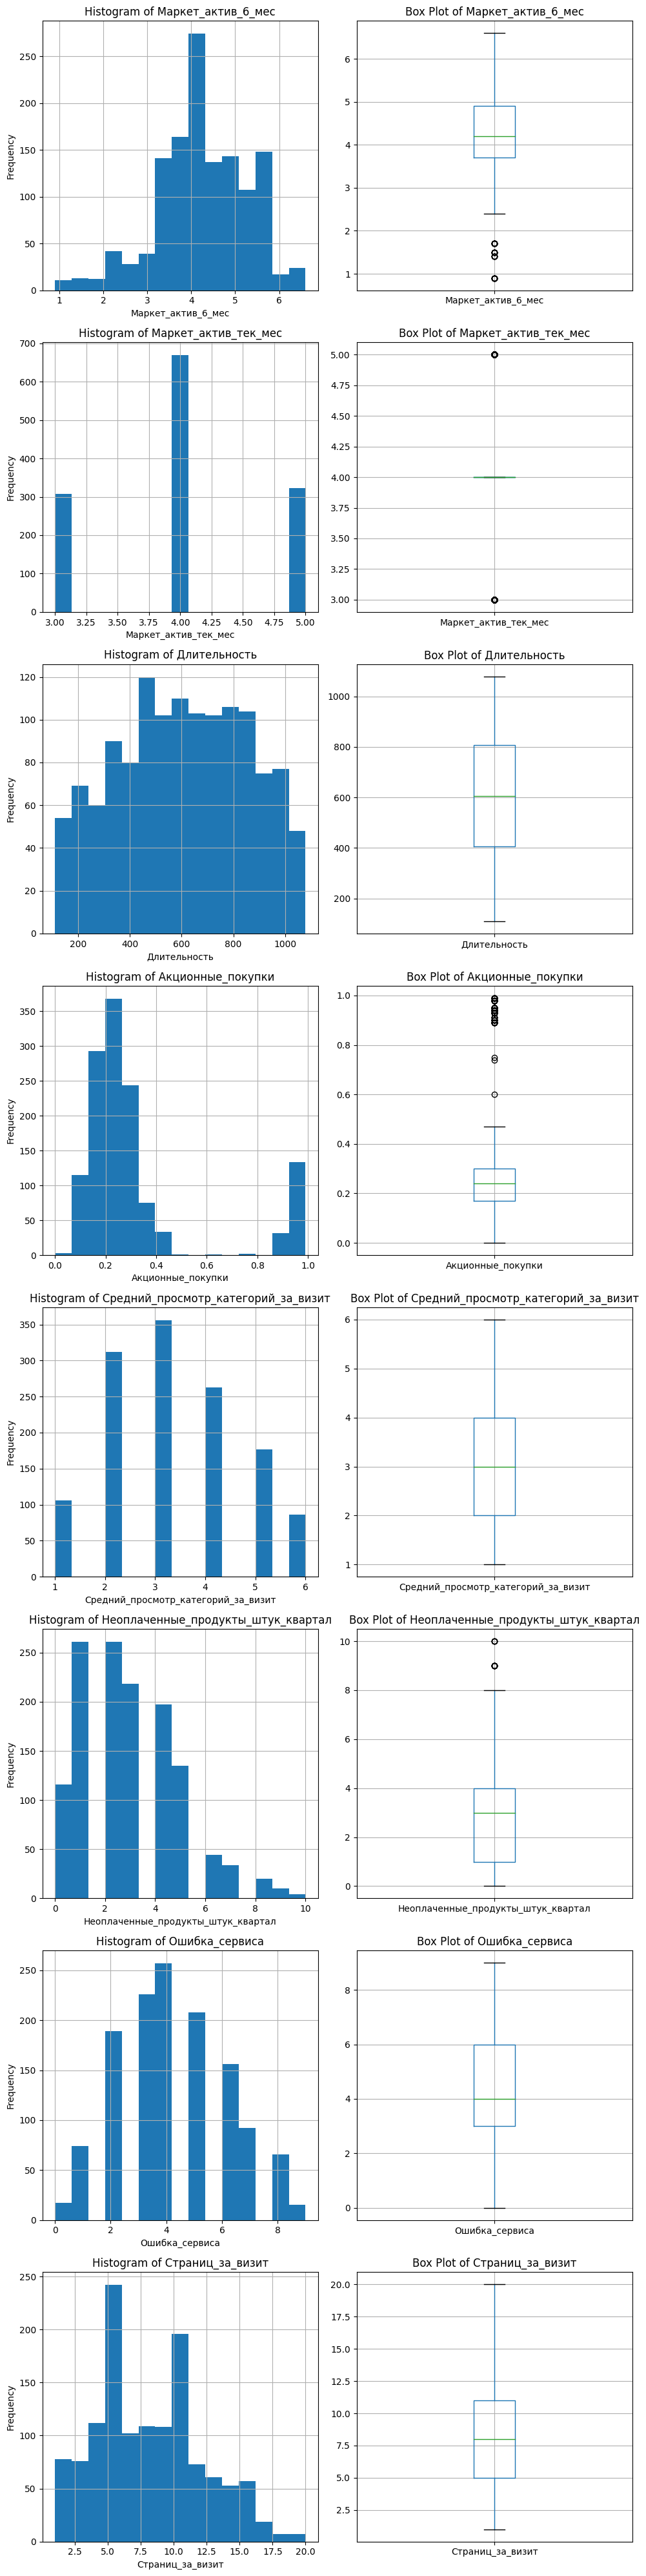

In [29]:
plot_histograms_boxplots(market_file)

Диаграмма для параметра Маркет_актив_тек_мес выглядит так потому что уникальных значений всего 3

В параметрах Маркет_актив_6_мес, Акционные_покупки, Неоплаченные_продукты_штук_квартал присутствуют выбросы

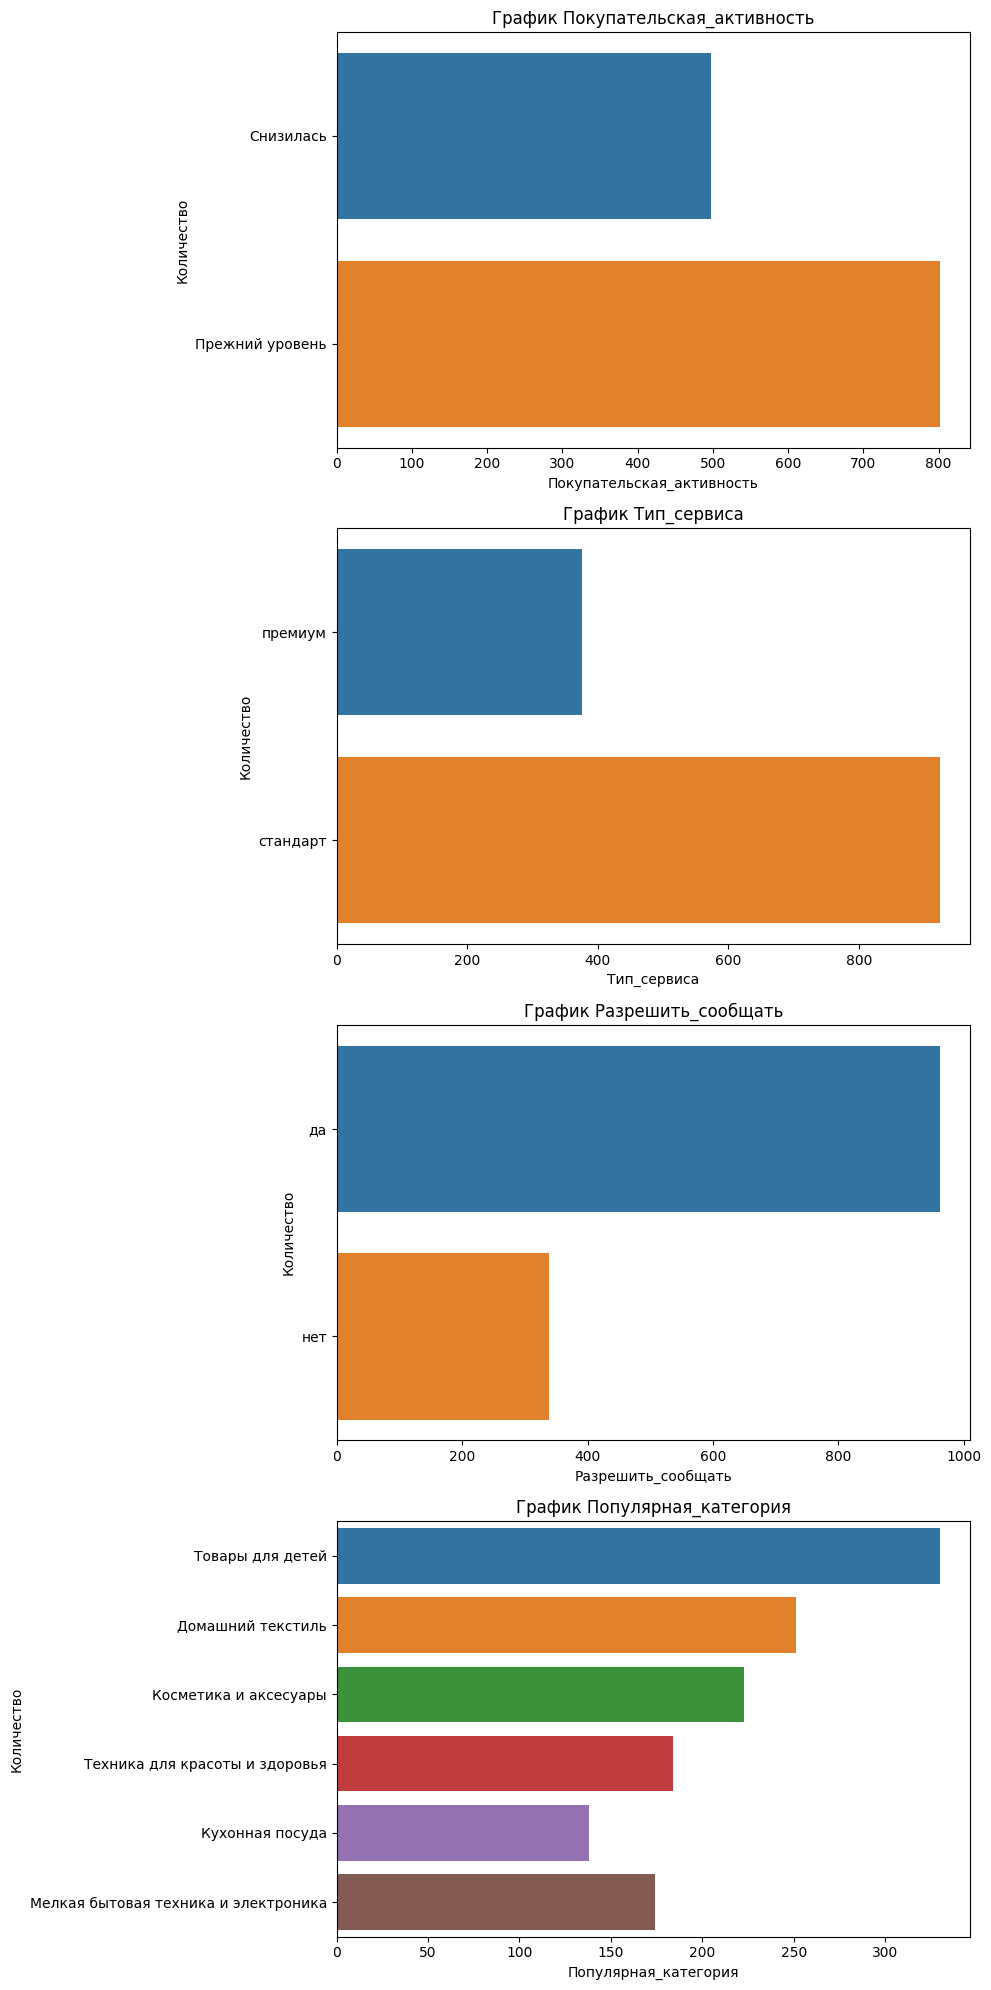

In [30]:
# Изучим распределение
plot_countplots(market_file)

В параметрах: *Тип_сервиса* и *Разрешить_сообщать* виден дисбаланс в значениях.   
Тажке он есть и в целевом признаке *Покупательская_активность*

In [31]:
market_money.describe()

,Выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


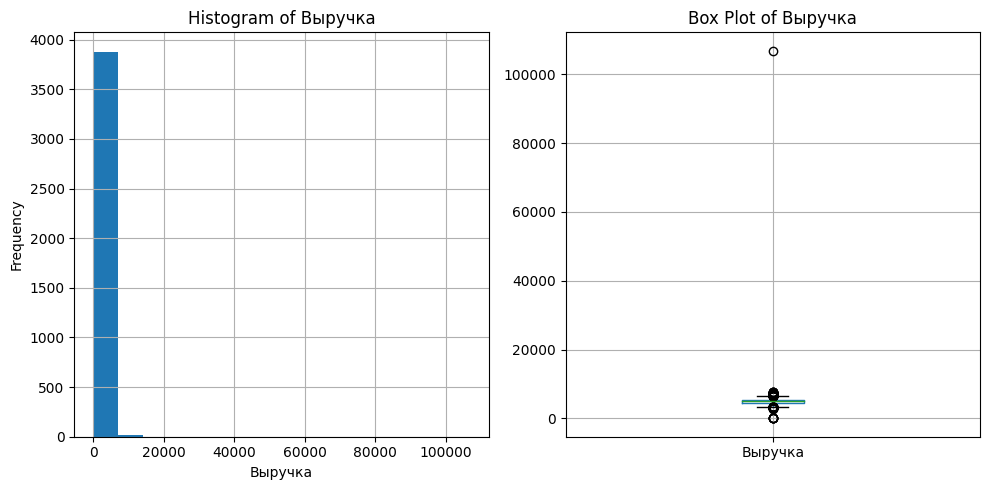

In [32]:
plot_histograms_boxplots(market_money)

В параметре *Выручка* имеется выброс, найдем и удалим его

In [33]:
market_money.sort_values(by='Выручка', ascending=False).head()

,Период,Выручка
id,,
215380,текущий_месяц,106862.2
215493,текущий_месяц,7799.4
215435,текущий_месяц,7605.3
215841,текущий_месяц,7557.0
216144,текущий_месяц,7547.8


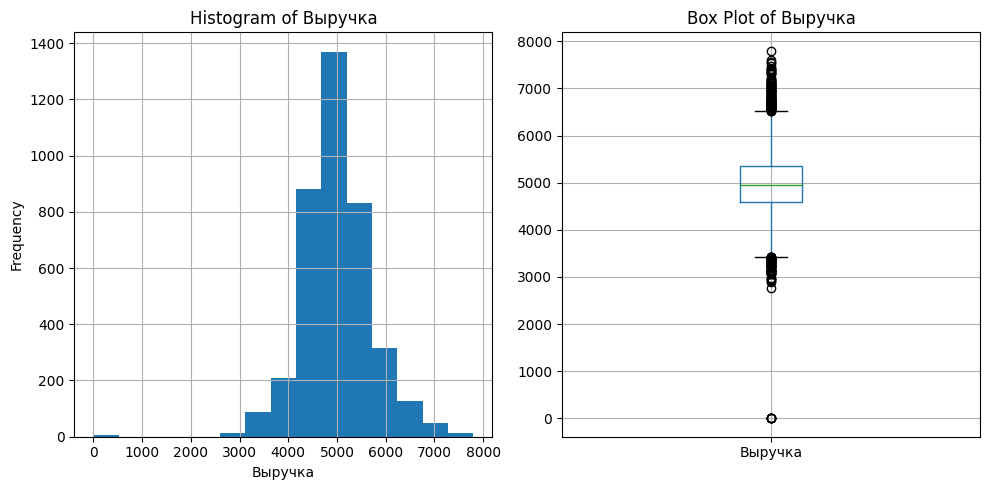

In [34]:
market_money = market_money[market_money['Выручка'] != 106862.2]
plot_histograms_boxplots(market_money)

Значение 0 тоже похоже на выброс, удалим и его

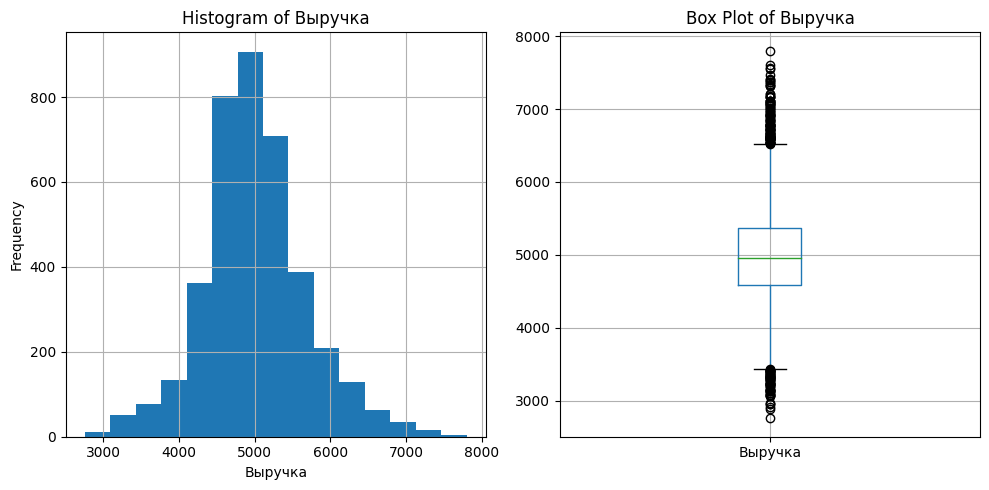

In [35]:
market_money = market_money[market_money['Выручка'] != 0]
plot_histograms_boxplots(market_money)

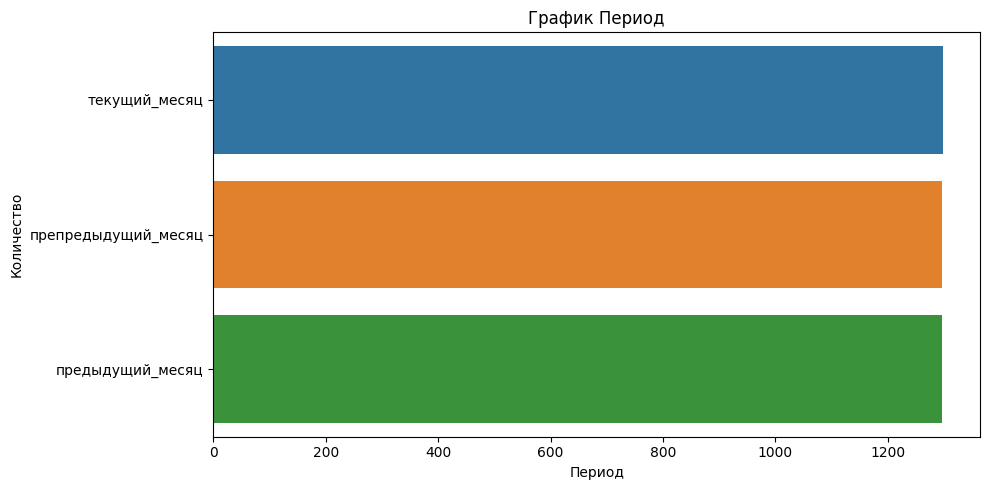

In [36]:
plot_countplots(market_money)

In [37]:
market_time.describe()

,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


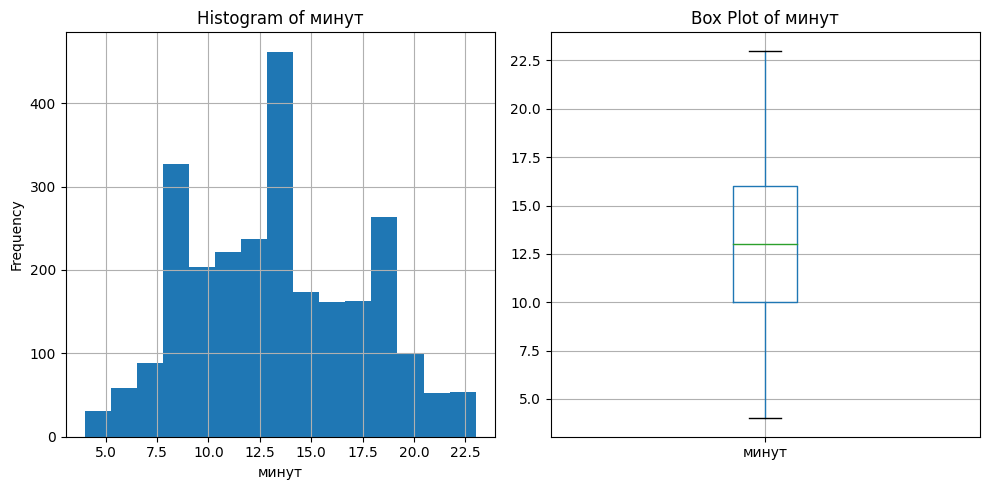

In [38]:
plot_histograms_boxplots(market_time)

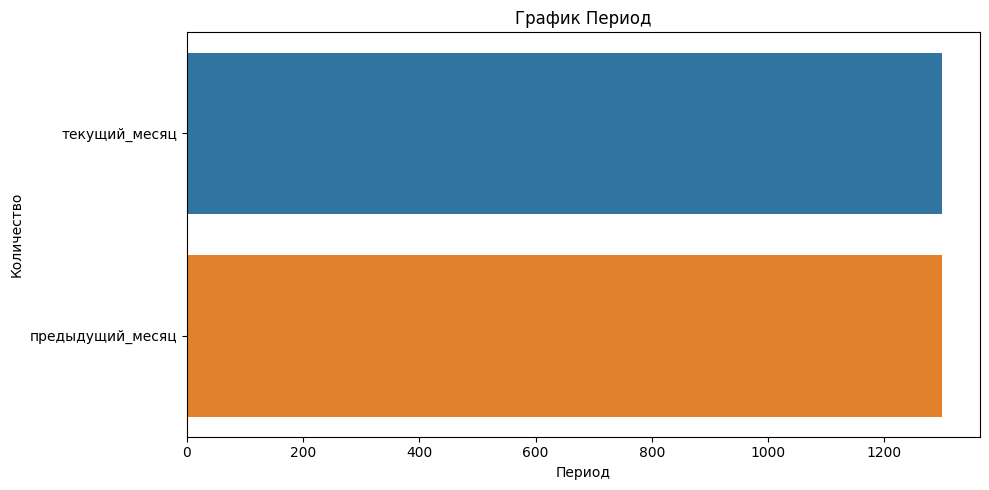

In [39]:
plot_countplots(market_time)

In [40]:
money.describe()

,Прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


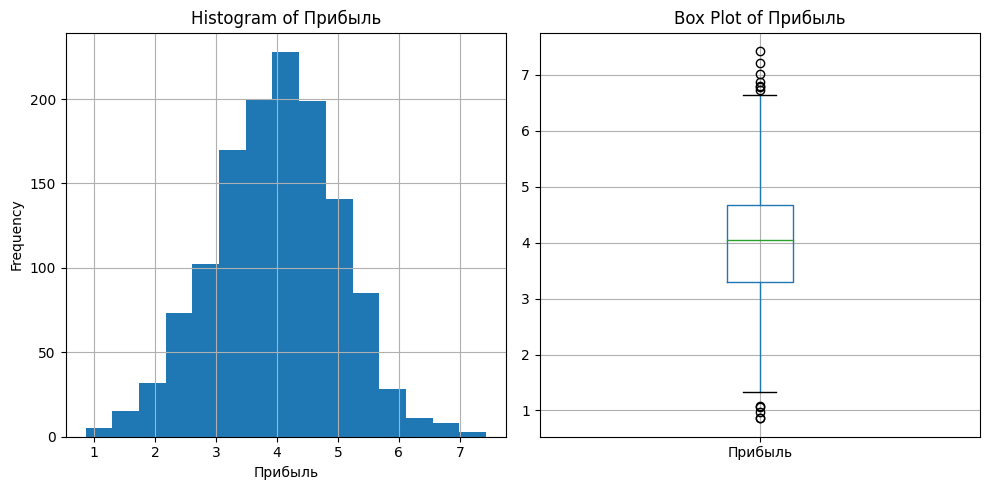

In [41]:
plot_histograms_boxplots(money)

Чтобы отобрать пользователей с покупательской активностью не менее трёх месяцев можно просто взять пользователей из таблицы money. Данныя таблица как раз хранит данные о среднемесячной прибыли покупателя за последние 3 месяца. Так как в таблице нет значений равные 0 следовательно все пользователи совершали покупки в течении нужного срока

**Вывод**

В данных присутствуют выбросы и наблюдается неравномерное распределение в данных.

## Шаг 4. Объединение таблиц

### 4.1. Объединим таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделаем отдельный столбец для каждого периода

Перед тем как объядинять данные явно переименуем столблец Период в таблице market_money на Период_деньги, а Период в таблице market_time на Период_время

In [42]:
pivot_market_money = market_money.pivot_table(index='id', columns='Период', values='Выручка').reset_index()

In [43]:
pivot_market_money.columns = ['id', 'период_текущий_месяц', 'период_предыдущий_месяц', 'период_препредыдущий_месяц']
pivot_market_money = pivot_market_money.dropna()
pivot_market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1296 non-null   int64  
 1   период_текущий_месяц        1296 non-null   float64
 2   период_предыдущий_месяц     1296 non-null   float64
 3   период_препредыдущий_месяц  1296 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.6 KB


In [44]:
market_time
pivot_market_time = market_time.pivot_table(index='id', columns='Период', values='минут').reset_index()
pivot_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                1300 non-null   int64
 1   предыдущий_месяц  1300 non-null   int64
 2   текущий_месяц     1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


In [45]:
merged_df = pd.merge(pivot_market_money, pivot_market_time, on='id', how='inner')

In [46]:
merged_df.set_index('id')

,период_текущий_месяц,период_предыдущий_месяц,период_препредыдущий_месяц,предыдущий_месяц,текущий_месяц
id,,,,,
215349,5216.0,4472.0,4971.6,12,10
215350,5457.5,4826.0,5058.4,8,13
215351,6158.0,4793.0,6610.4,11,13
215352,5807.5,4594.0,5872.5,8,11
215353,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...
216643,3664.0,4704.0,4741.7,14,7
216644,4729.0,5299.0,5353.0,12,11
216645,5160.0,5334.0,5139.2,12,18


Объединяем таблицы

In [47]:
df_full = pd.merge(merged_df,market_file, on='id', how='inner')

In [48]:
df_full.set_index('id')

,период_текущий_месяц,период_предыдущий_месяц,период_препредыдущий_месяц,предыдущий_месяц,текущий_месяц,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,5457.5,4826.0,5058.4,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,6158.0,4793.0,6610.4,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,4738.5,5124.0,5388.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,3664.0,4704.0,4741.7,14,7,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
216644,4729.0,5299.0,5353.0,12,11,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
216645,5160.0,5334.0,5139.2,12,18,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7


In [49]:
df_full.shape

(1296, 18)

In [50]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   период_текущий_месяц                 1296 non-null   float64
 2   период_предыдущий_месяц              1296 non-null   float64
 3   период_препредыдущий_месяц           1296 non-null   float64
 4   предыдущий_месяц                     1296 non-null   int64  
 5   текущий_месяц                        1296 non-null   int64  
 6   Покупательская_активность            1296 non-null   object 
 7   Тип_сервиса                          1296 non-null   object 
 8   Разрешить_сообщать                   1296 non-null   object 
 9   Маркет_актив_6_мес                   1296 non-null   float64
 10  Маркет_актив_тек_мес                 1296 non-null   int64  
 11  Длительность                  

Вывод: Кажется объединение прошло успешно. Типы в норме и нет NaN

## Шаг 5. Корреляционный анализ

In [53]:
df_full.head()

,id,период_текущий_месяц,период_предыдущий_месяц,период_препредыдущий_месяц,предыдущий_месяц,текущий_месяц,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [54]:
df_without_id = df_full.drop(columns=['id'])

In [55]:
# Разделение DataFrame на две части по фактору "покупательская активность"
df_lower_activity = df_without_id[df_without_id['Покупательская_активность'] == 'Снизилась']
df_same_activity = df_without_id[df_without_id['Покупательская_активность'] == 'Прежний уровень']

C:\Users\rdl_b\anaconda3\envs\mine\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


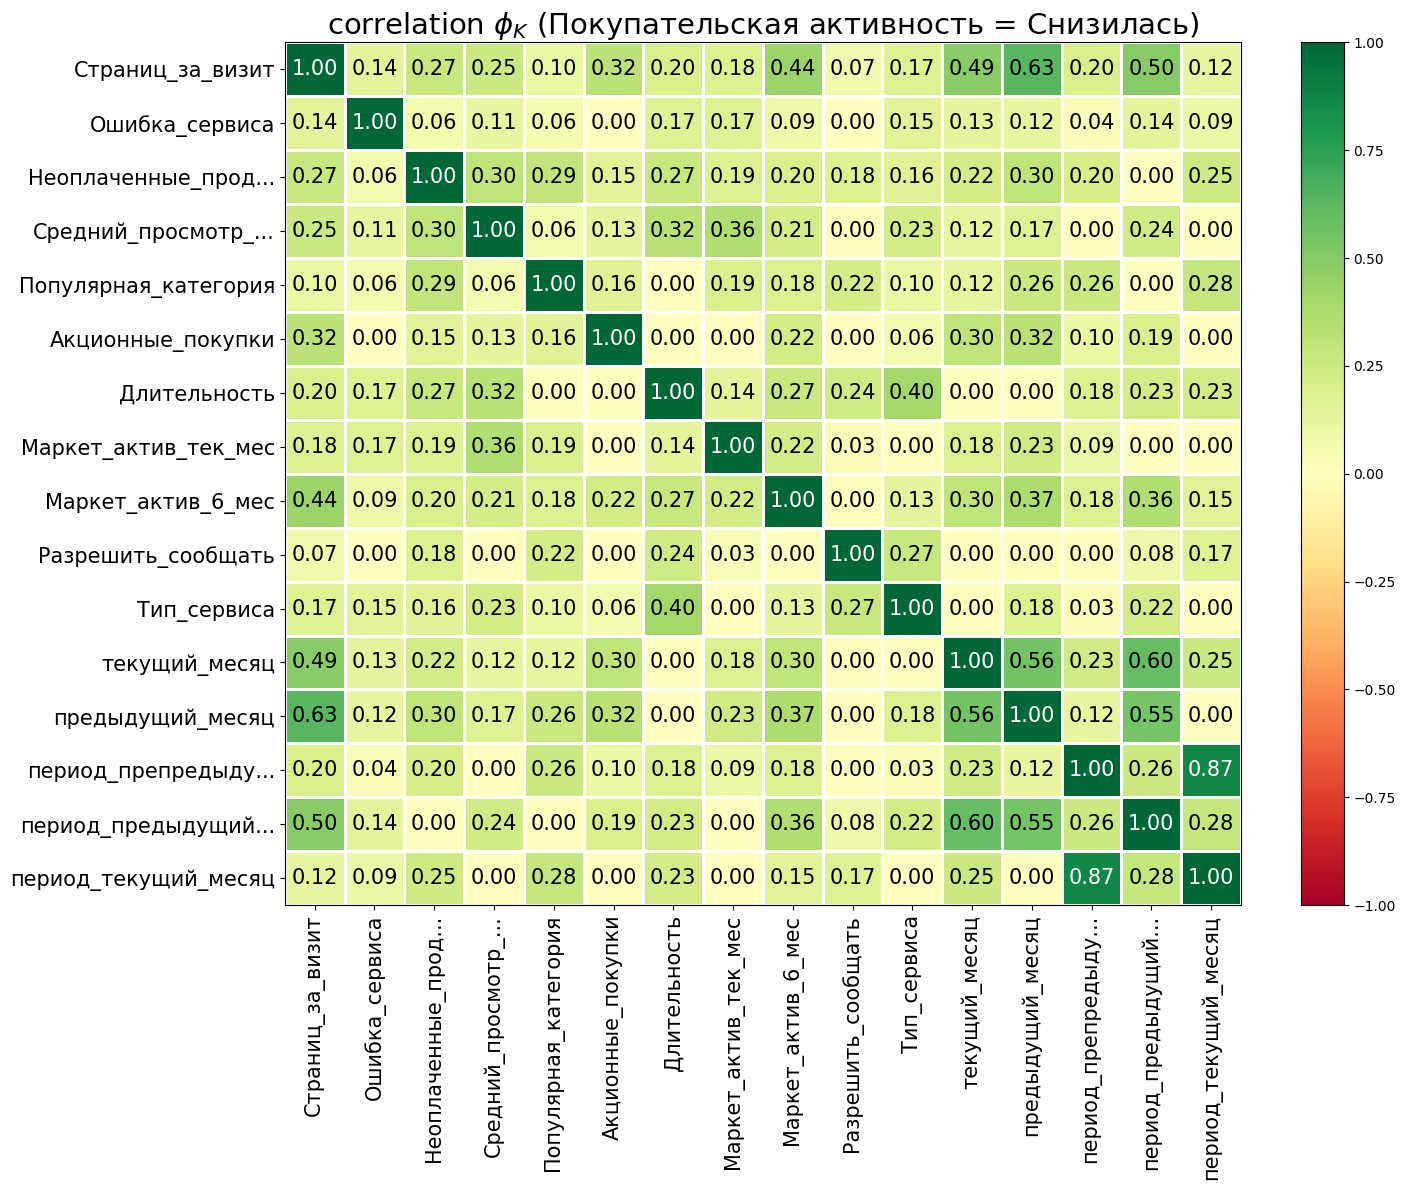

In [56]:
interval_cols = ['период_текущий_месяц', 'период_предыдущий_месяц',
       'период_препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит']

# Вычисление матрицы корреляции phi для первой части (покупательская активность = 'снизилась')
phik_lower_activity = df_lower_activity.phik_matrix(interval_cols=interval_cols)

# Визуализация тепловой карты корреляций для первой части
plot_correlation_matrix(
    phik_lower_activity.values,
    x_labels=phik_lower_activity.columns,
    y_labels=phik_lower_activity.index,
    title=r"correlation $\phi_K$ (Покупательская активность = Снизилась)",
    fontsize_factor=1.5,
    figsize=(15, 12)
)


C:\Users\rdl_b\anaconda3\envs\mine\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


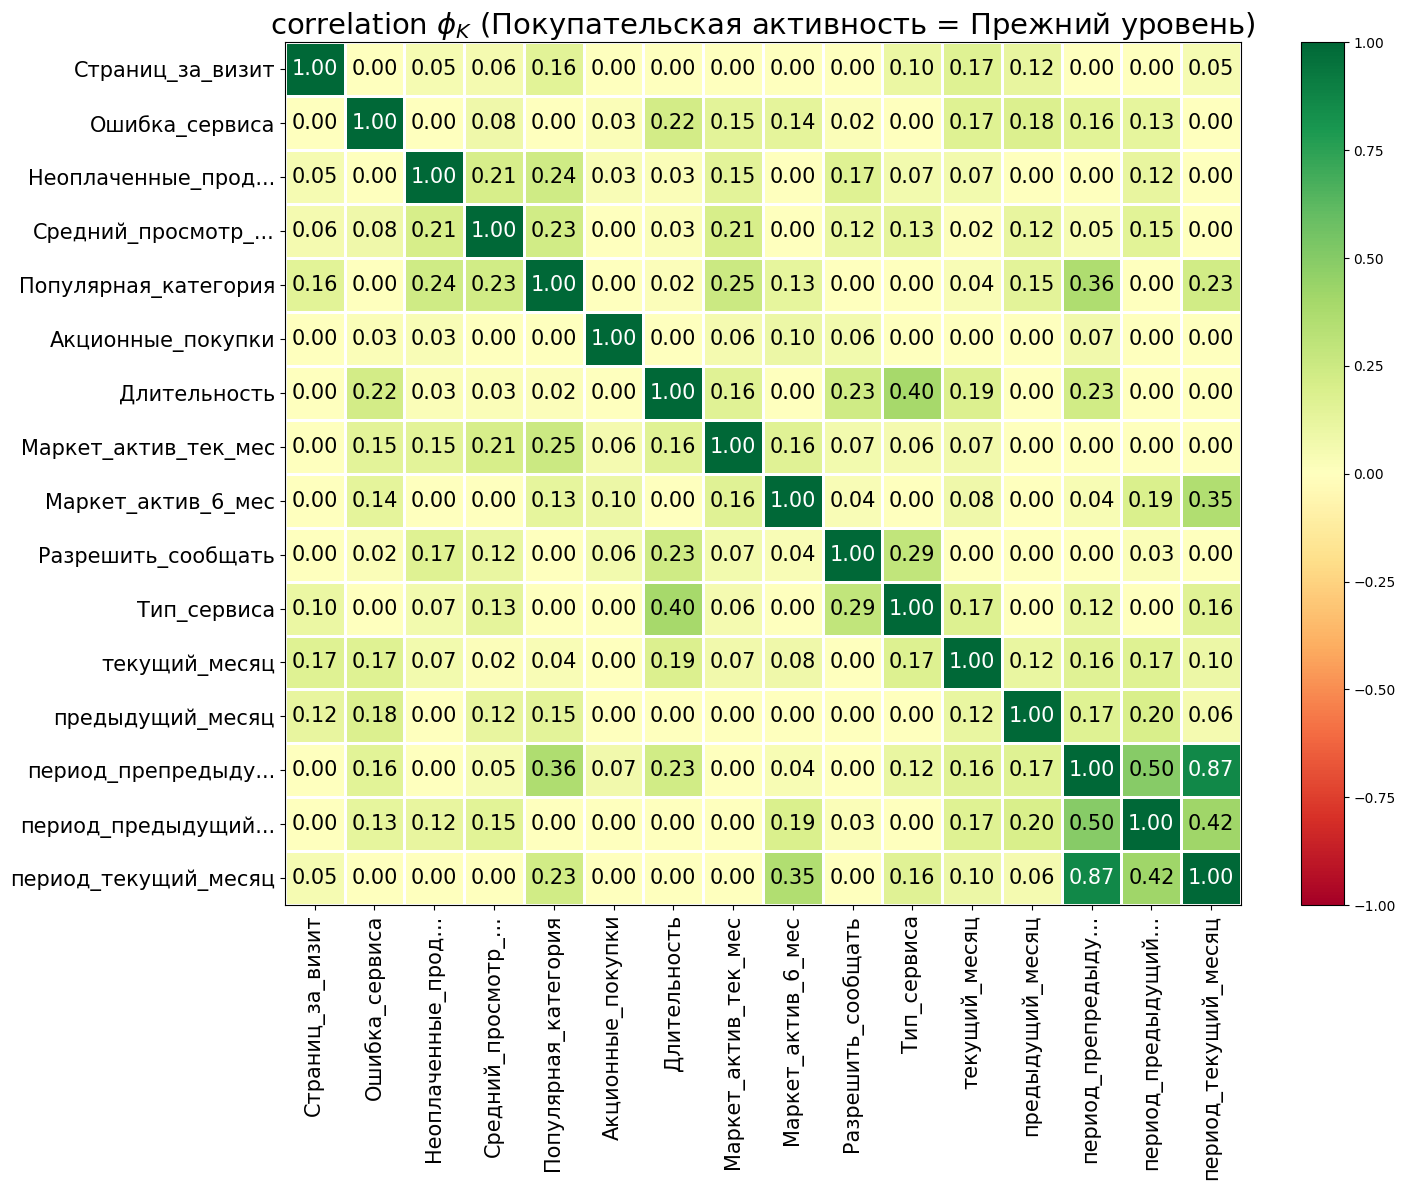

In [57]:
interval_cols = ['период_текущий_месяц', 'период_предыдущий_месяц',
       'период_препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит']

# Вычисление матрицы корреляции phi для второй части (покупательская активность = 'Прежний уровень')
phik_same_activity = df_same_activity.phik_matrix(interval_cols=interval_cols)

# Визуализация тепловой карты корреляций для второй части
plot_correlation_matrix(
    phik_same_activity.values,
    x_labels=phik_same_activity.columns,
    y_labels=phik_same_activity.index,
    title=r"correlation $\phi_K$ (Покупательская активность = Прежний уровень)",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

**Вывод**
1. Очень высоких корреляций (0.9 +) не видно, мультиколлинеарности не обнаружено
2. По гистограмма видно, что целевые данные очень сильно "перемешаны"

## Шаг 6. Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:  
- использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
- использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [58]:
X = df_without_id.drop(['Покупательская_активность'], axis=1)
y = df_without_id['Покупательская_активность']

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   период_текущий_месяц                 1296 non-null   float64
 1   период_предыдущий_месяц              1296 non-null   float64
 2   период_препредыдущий_месяц           1296 non-null   float64
 3   предыдущий_месяц                     1296 non-null   int64  
 4   текущий_месяц                        1296 non-null   int64  
 5   Тип_сервиса                          1296 non-null   object 
 6   Разрешить_сообщать                   1296 non-null   object 
 7   Маркет_актив_6_мес                   1296 non-null   float64
 8   Маркет_актив_тек_мес                 1296 non-null   int64  
 9   Длительность                         1296 non-null   int64  
 10  Акционные_покупки                    1296 non-null   float64
 11  Популярная_категория          

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

ohe_columns = ['Тип_сервиса', 'Разрешить_сообщать', 'Популярная_категория']
ord_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
               'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'период_текущий_месяц', 'период_предыдущий_месяц', 'период_препредыдущий_месяц', 'предыдущий_месяц','текущий_месяц',]

In [61]:
ohe_columns = ['Разрешить_сообщать', 'Популярная_категория']
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
               'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'период_текущий_месяц', 'период_предыдущий_месяц', 'период_препредыдущий_месяц', 'предыдущий_месяц','текущий_месяц',]

In [62]:
# создаём общий пайплайн для подготовки данных

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

ord_pipe = Pipeline(
    [
        ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan))
    ]
)


data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1.0, 10.0, 100.0],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['linear',  'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                            

**Вывод**
Получили подель с показателоем ROC-AUC 0,91, для этого использовалась метод SVC(probability=True, random_state=42)).


## Шаг 7. Анализ важности признаков

7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.   
7.2 Сделайте выводы о значимости признаков:  
какие признаки мало значимы для модели;  
какие признаки сильнее всего влияют на целевой признак;  
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.  

In [63]:
preprocessor = randomized_search.best_estimator_['preprocessor']
names = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out().tolist()
names.append('тип_сервиса')
for i in num_columns:
    names.append(i)
names

['x0_нет',
 'x1_Косметика и аксесуары',
 'x1_Кухонная посуда',
 'x1_Мелкая бытовая техника и электроника',
 'x1_Техника для красоты и здоровья',
 'x1_Товары для детей',
 'тип_сервиса',
 'Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'период_текущий_месяц',
 'период_предыдущий_месяц',
 'период_препредыдущий_месяц',
 'предыдущий_месяц',
 'текущий_месяц']

  0%|          | 0/324 [00:00<?, ?it/s]

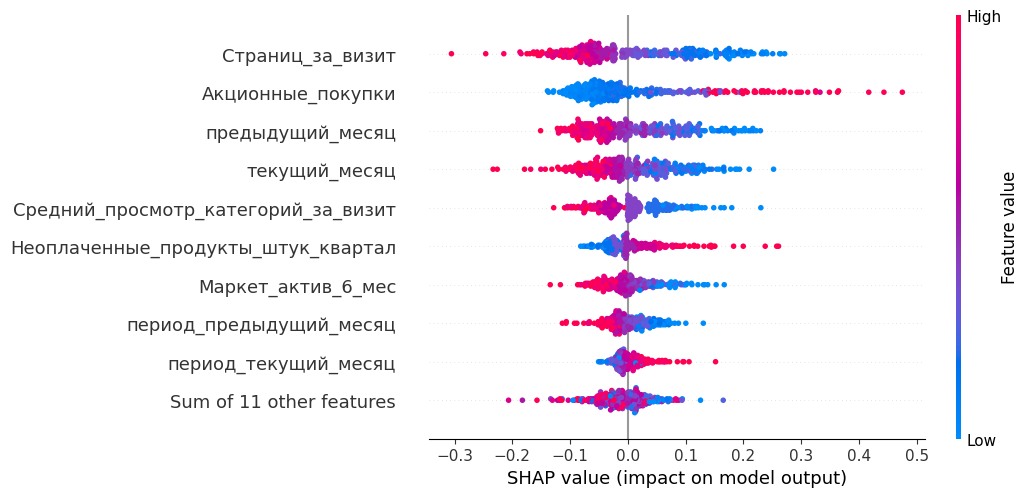

In [64]:
preprocessor = randomized_search.best_estimator_['preprocessor']
X_train_encoded = preprocessor.fit_transform(X_train)
model = randomized_search.best_estimator_.named_steps['models']
X_train_encoded.shape, model

X_shap = shap.kmeans(X_train_encoded, 19)
explainer = shap.KernelExplainer(model.predict_proba, X_shap,feature_names=names)

x_test_shap = preprocessor.transform(X_test)
shap_values = explainer(x_test_shap)
shap.plots.beeswarm(shap_values[:, :, 1])

  0%|          | 0/20 [00:00<?, ?it/s]

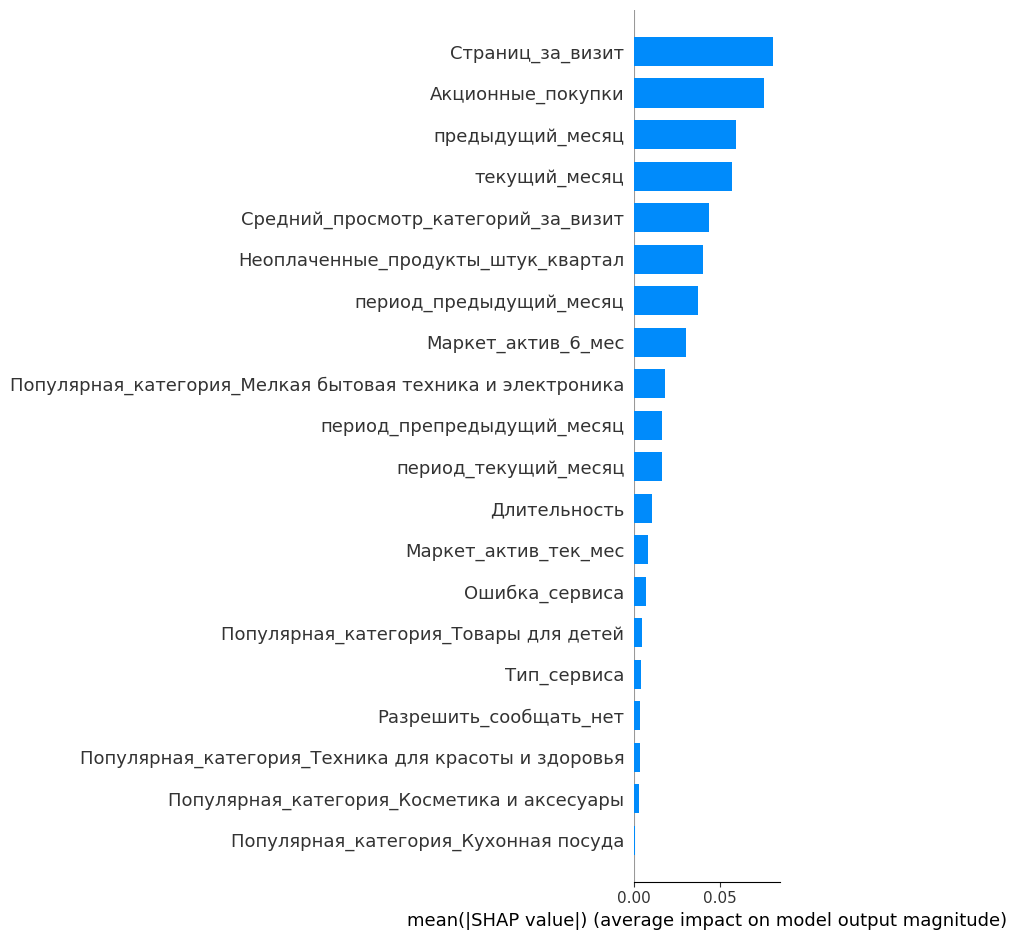

In [65]:
COUNT = 20
 
best_model = randomized_search.best_estimator_.named_steps['models']

preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)
ord_feature_names = ord_columns
num_feature_names = num_columns


all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer.shap_values(X_test_preprocessed_smpl)

shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed_smpl, plot_type='bar' )

**Вывод**
1. Отсуствует параметр который "перетягивает на себя одеяло".
2.  Сильнее всего влияют: "Акционные покупки", "Страниц_за_визит", "предыдущий_месяц", "текущий_месяц", "Средний_просмотр_категорий_за_визит".


## Шаг 8. Сегментация покупателей


### 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.  
Сделайте предложения по работе с сегментом для увеличения покупательской активности.  

8.3 Сделайте выводы о сегментах:  
какой сегмент вы взяли для дополнительного исследования,  \
какие предложения вы сделали и почему.

In [66]:
threshold = 0.8

# 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
# Применим модель для всех данных
best_model = randomized_search.best_estimator_
predictions = best_model.predict_proba(X)[:, 1]
prediction_flags = np.where(predictions > threshold, True, False)

Добавим predictions как новый столбец, и потом отсортируем по нему и прибыли

In [67]:
df_seg = df_full.join(money, on='id')

In [68]:
df_seg['вероятность_снижения'] = predictions

In [69]:
df_seg_1 =  df_seg.loc[prediction_flags]

In [70]:
df_seg_1 =  df_seg_1.loc[df_seg['Прибыль'] > 3]

In [71]:
df_seg_2 = df_seg.loc[df_seg['вероятность_снижения']<=0.8]


In [72]:
df_seg_2 = df_seg_2.loc[df_seg_2['Прибыль']<=3]


In [73]:
df_seg_3 = df_seg.loc[df_seg['вероятность_снижения']<0.8]
df_seg_3 = df_seg_3.loc[df_seg_3['Прибыль']>3]
df_seg_4 = df_seg.loc[df_seg['вероятность_снижения']>0.8]
df_seg_4 = df_seg_4.loc[df_seg_4['Прибыль']<3]

In [74]:
df_merge = df_seg_2.merge(df_seg_3, how = 'outer')
df_merge = df_merge.merge(df_seg_4, how = 'outer')

Выбранный сегмент: Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью


<function matplotlib.pyplot.show(close=None, block=None)>

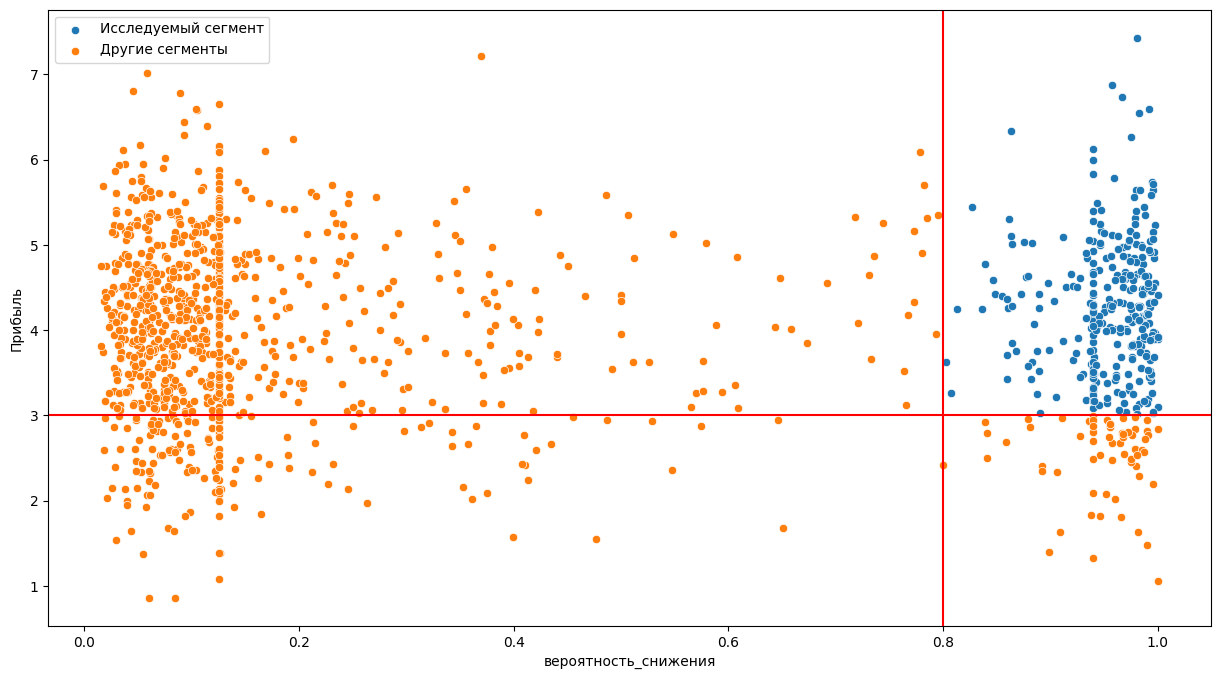

In [75]:
print('Выбранный сегмент: Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью')
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_seg_1,  x = 'вероятность_снижения', y = 'Прибыль', label = 'Исследуемый сегмент')
plt.legend()
sns.scatterplot(data=df_merge,  x = 'вероятность_снижения', y = 'Прибыль', label = 'Другие сегменты')
plt.legend()
plt.axvline(x=0.8, color='red')
plt.axhline(y=3, color='red')
plt.show

In [76]:
df_seg_1.head()

,id,период_текущий_месяц,период_предыдущий_месяц,период_препредыдущий_месяц,предыдущий_месяц,текущий_месяц,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Прибыль,вероятность_снижения
0,215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4.16,0.985017
3,215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4.21,0.939427
5,215354,5685.0,4503.0,5869.6,11,12,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,3.62,0.802776
7,215356,4146.5,4433.0,4566.4,6,7,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4.93,0.939129
9,215360,5304.5,5555.0,5834.9,9,6,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,4.55,0.897470


### 8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность:
     - Проведите графическое и аналитическое исследование группы покупателей
     - Сделайте предложения по работе с сегментом для увеличения покупательской активности

**У нас есть уже список параметров которые влияют на снижение покупательской активности. 
 Возьмем первые 5 и выделим группу на основе них
"Акционные покупки", "Страниц_за_визит", "предыдущий_месяц", "текущий_месяц", "Средний_просмотр_категорий_за_визит"**




Text(0.5, 1.0, 'Акционные покупки')

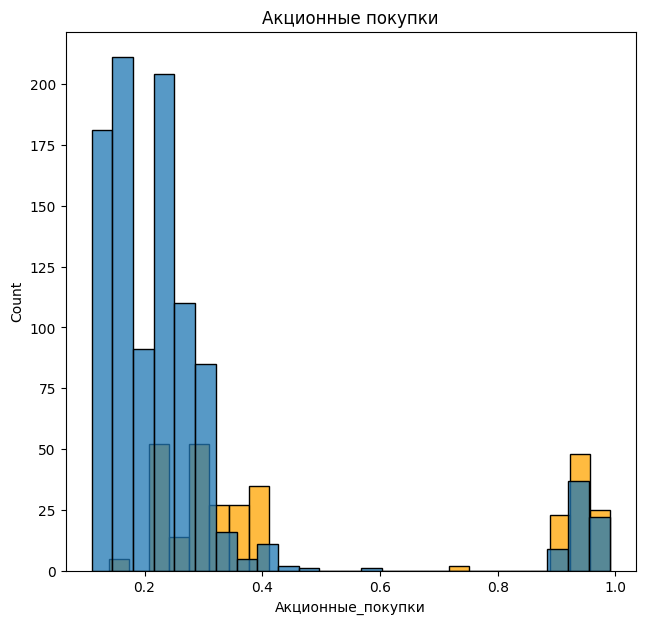

In [77]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_seg_1['Акционные_покупки'], bins=25, color='orange')
sns.histplot(df_merge['Акционные_покупки'], bins=25)
plt.title('Акционные покупки')

Можно заметить, что есть небольшое кол-во из исследуемого сегмента любят акционные покупки, думаю можно предлагать больше акций для таких покупателей, для удержания их нужно больше предлагать различных акций

Text(0.5, 1.0, 'Страниц_за_визит')

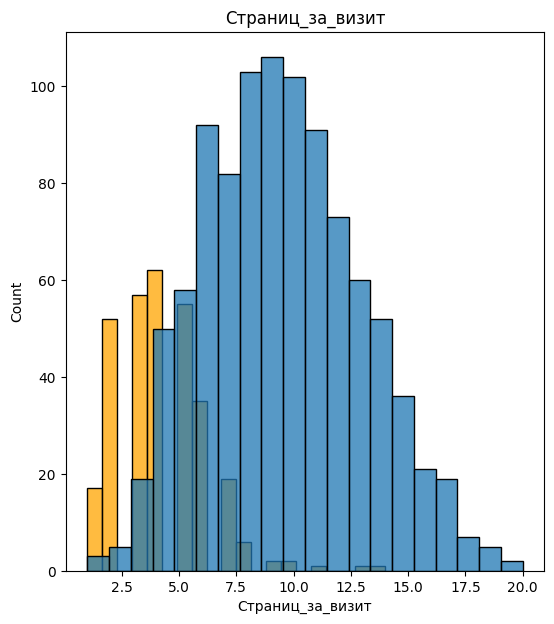

In [78]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_seg_1['Страниц_за_визит'], bins=20, color='orange')
sns.histplot(df_merge['Страниц_за_визит'], bins=20)
plt.title('Страниц_за_визит')

Очень мало перемещений по сайту, возможно следующие варианты:
1. Улучшить(упростить) интерфейс, если мы хотим, чтобы человек задерживался на сайте
2. По индентификации пользователя, предлагать уже понравившиеся товары на главных странницах, и в дополнении к ним смежные товары которые могут заинтересовать данного пользователя
3. Возможно сделать небольшой опрос с предпочтениями клиента.

Text(0.5, 1.0, 'Минут на сайте за текущий месяц')

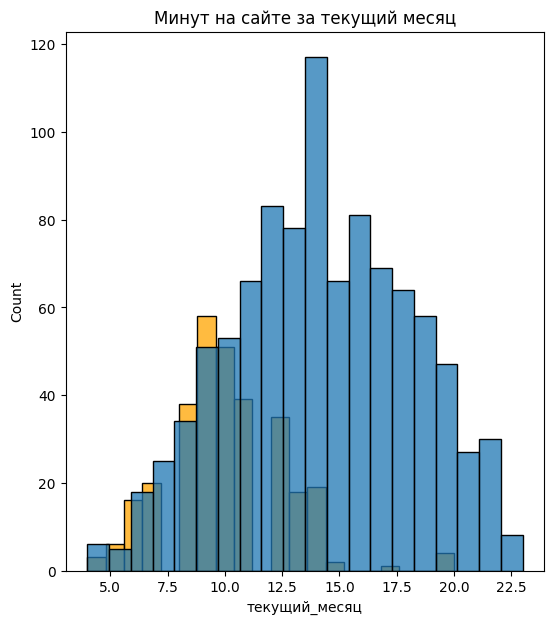

In [79]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_seg_1['текущий_месяц'], bins=20, color='orange')
sns.histplot(df_merge['текущий_месяц'], bins=20)
plt.title('Минут на сайте за текущий месяц')

Text(0.5, 1.0, 'Минут на сайте за предыдущий_месяц')

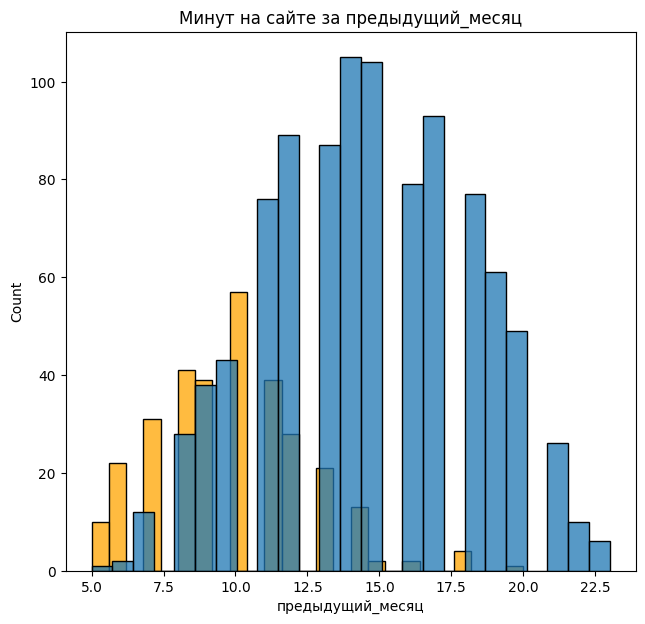

In [80]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_seg_1['предыдущий_месяц'], bins=25, color='orange')
sns.histplot(df_merge['предыдущий_месяц'], bins=25)
plt.title('Минут на сайте за предыдущий_месяц')

По двум гистраграмма видно, что клиенты не любят засиживаться на сайте. Нужны его улучшения

Text(0.5, 1.0, 'Средний_просмотр_категорий_за_визит')

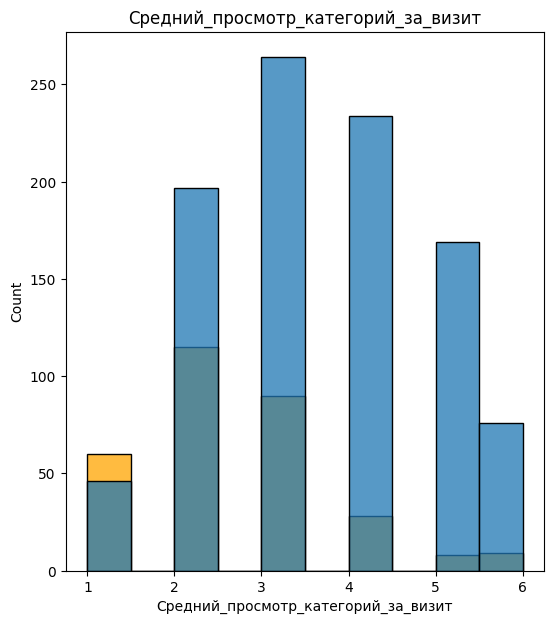

In [81]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_seg_1['Средний_просмотр_категорий_за_визит'], bins=10, color='orange')
sns.histplot(df_merge['Средний_просмотр_категорий_за_визит'], bins=10)
plt.title('Средний_просмотр_категорий_за_визит')

Больше других покупают одни и теже товары. Предлагать разнообразие с целью заинтересовонасти клиента.

### 8.3 Выводы.
**Выбранный сегмент: Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**
1. Можно заметить, что есть небольшое кол-во из исследуемого сегмента любят акционные покупки, необходимо предлагать больше акций для таких покупателей, для их удержания.
2. Улучшить(упростить) интерфейс, если мы хотим, чтобы человек задерживался на сайте
    а) По индентификации пользователя, предлагать уже понравившиеся товары на главных странницах, и в дополнении к ним смежные товары которые могут заинтересовать данного пользователя
    б) Cделать небольшой опрос с предпочтениями клиента.
3. По двум гистраграмма видно, что клиенты не любят засиживаться на сайте. Нужны его улучшения
4. Больше других покупают одни и теже товары. Предлагать разнообразие с целью заинтересовонасти клиента.

## Шаг 9. Общий вывод

В начале проекта были поставлены следующие задачи

1. Построить модель для предсказания снижения покупательской активноски
2. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

В качестве данных были предоставлены 4 таблицы

- market_file.csv. Таблица с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- market_money.csv. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- market_time.csv. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- money.csv. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Для поиcка лучшей модели были проделаны следующие шаги

- 1 - изучены данные
- 2 - обработаны пропуски и дубликаты
- 3 - исследованы на качество, проверены на выбросы и аномалии
- 4 - исследованы взаимосвязи количественных признаков с помощью корреляционного анализа
- 4 - объединены данные чтобы у модели были больше признаков для обучения
- 5 - настроенна автоматизация обучения с помощью пайпдайнов, в которых были обучены 2 типа моделей: линейные и на основе векторов
- 6 - лучшая модель оказалась SVC

На основе выбранной модели был построен график с параметрами, которые сильнее всего влияют предсказание. На основе этих параметров был сделан вывод, что при снижении покупательской активности стоит акцентировать внимание пользователей на акционные товары в самых просматриваемых категориях.